### Pyber Evaluation
   >* TREND OBSERVATION 1: The Rural market, because of low driver count, has the highest fare earned per driver at 55.49 USD, the highest average fare at 34.62 USD, and the highest number of average rides per driver at 1.6. These drivers have a pricing advantage on riders. 
   
   >* TREND OBSERVATION 2: The Urban market is overrun with drivers. Because of the high supply of drivers, rates are very competitive and the Urban market runs an average earned fare per driver of only 16.57 USD, just 30% of the Rural market's average earnings per driver. Further, the Urban market runs an average fare of 24.53 USD. It is likely that this does not decline as steeply as the fare per driver, and holds at 71% of the Rural average fare, because of the offsetting increase during surge pricing cycles (ex. rush hour,  events, bar close, etc.). Despite having over 68% of all of Pyber's rides, because of driver saturation, there are only 0.7 rides per driver. Riders have the advantage in the Urban market.
   
   >* TREND OBSERVATION 3: Per observations 1 and 2, Pyber is having some supply and demand issues between market types. Urban drivers have to seemingly work harder (drive more people) for the equivalent money, but have the opportunity to do so more frequently and likely more conveniently, due to ride volume.
   
   
   >Pyber should consider incentives to shift a few drivers to the Rural market. If they simply shared this information with their drivers, they would likely see a natural shift due to the difference in per fare and per driver earnings. These shifts will cause flux within the current numbers, but they may see that they run more fares for more profit overall. <br/><br/>
   >At half the amount of fares per driver as the Rural market, Pyber should consider a driver cap. While less advantageous for the riders, it would allow for more rides per driver and may allow for the prices to increase due to less immediate driver availability. <br/><br/>
   >Potential exists to shift drivers outward from city center. Drivers on the edges of the Urban market could pick up fares in the Suburban market, and those on the edges of the Suburbs could start running fares in the Rural market, bringing a bit more balance. <br/><br/>
   **Requires additional location data and testing.

In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_path = os.path.join('Data', 'city_data.csv')
ride_path = os.path.join('Data', 'ride_data.csv')

city_info = pd.read_csv(city_path) # city_info raw columns >> city, driver_count, type
ride_info = pd.read_csv(ride_path) # ride_info raw columns >> city, date (<<DROP COLUMN, not needed), fare, ride_id

primary_df = pd.merge(city_info, ride_info, how = 'outer', on = 'city', sort = False)

primary_df = primary_df[['type', 'city', 'driver_count', 'ride_id', 'fare']]
primary_df = (primary_df.rename(columns = {'type': 'Market Type', 
                                           'city': 'City', 
                                           'driver_count': 'Number of Drivers',
                                           'ride_id': 'Ride ID', 
                                           'fare': 'Fare'}))
# primary_df.head()

In [3]:
# Create manipulatable df copy so as not to overwrite primary_df.
# This copied df summarizes ride count, average fare per city, and total fares per city with cities grouped by market type.

market_cities_by_groups_df = pd.DataFrame(primary_df)
market_cities_by_groups_df = market_cities_by_groups_df.groupby(['Market Type', 'City'])
city_ridefares_df = market_cities_by_groups_df['Fare'].agg(['count', 'mean', 'sum'])
city_ridefares_df.columns = ['Number of Rides', 'Average Fare per Ride', 'Total Fares (City)']
# city_ridefares_df.head()

total_ALL_fares = city_ridefares_df['Total Fares (City)'].agg('sum')
# total_ALL_fares

total_ALL_rides = city_ridefares_df['Number of Rides'].agg('sum')
# total_ALL_rides

In [4]:
# Create driver_count_df for merge with rides/average fares df.

driver_count_df = pd.DataFrame(primary_df[['Market Type', 'City', 'Number of Drivers']])
driver_count_df = driver_count_df.drop_duplicates('City')
# driver_count_df.head()

total_ALL_drivers = driver_count_df['Number of Drivers'].agg('sum')
# total_ALL_drivers

In [5]:
# Merge city rides and fares with driver count by city

per_city_summary_df = pd.merge(city_ridefares_df, driver_count_df, how = 'outer', on = 'City', sort = False)
per_city_summary_df = (per_city_summary_df
    [['Market Type', 'City', 'Number of Drivers', 'Number of Rides', 'Average Fare per Ride', 'Total Fares (City)']])
# per_city_summary_df.head()

In [6]:
# Filter for RURAL market analysis.

rural_market = per_city_summary_df[per_city_summary_df['Market Type'] == 'Rural']
rural_drivers = rural_market['Number of Drivers'].agg('sum')
total_rural_rides = rural_market['Number of Rides'].agg('sum')
rural_fare_total = rural_market['Total Fares (City)'].agg('sum')
rural_average_fare = rural_fare_total / total_rural_rides
rural_driver_average = rural_fare_total / rural_drivers
rural_rides_per_driver = total_rural_rides / rural_drivers

# rural_market.head()
# rural_drivers
# total_rural_rides
# rural_fare_total
# rural_average_fare
# rural_driver_average
# rural_rides_per_driver

In [7]:
# Filter for SUBURBAN market analysis.

suburban_market = per_city_summary_df[per_city_summary_df['Market Type'] == 'Suburban']
suburban_drivers = suburban_market['Number of Drivers'].agg('sum')
total_suburban_rides = suburban_market['Number of Rides'].agg('sum')
suburban_fare_total = suburban_market['Total Fares (City)'].agg('sum')
suburban_average_fare = suburban_fare_total / total_suburban_rides
suburban_driver_average = suburban_fare_total / suburban_drivers
suburban_rides_per_driver = total_suburban_rides / suburban_drivers

# suburban_market.head()
# suburban_drivers
# total_suburban_rides
# suburban_fare_total
# suburban_average_fare
# suburban_driver_average
# suburban_rides_per_driver

In [8]:
# Filter for URBAN market analysis.

urban_market = per_city_summary_df[per_city_summary_df['Market Type'] == 'Urban']
urban_drivers = urban_market['Number of Drivers'].agg('sum')
total_urban_rides = urban_market['Number of Rides'].agg('sum')
urban_fare_total = urban_market['Total Fares (City)'].agg('sum')
urban_average_fare = urban_fare_total / total_urban_rides
urban_driver_average = urban_fare_total / urban_drivers
urban_rides_per_driver = total_urban_rides / urban_drivers

# urban_market.head()
# urban_drivers
# total_urban_rides
# urban_fare_total
# urban_average_fare
# urban_driver_average
# urban_rides_per_driver

## Bubble Plot of Pyber Multi-Market Ride Sharing Data

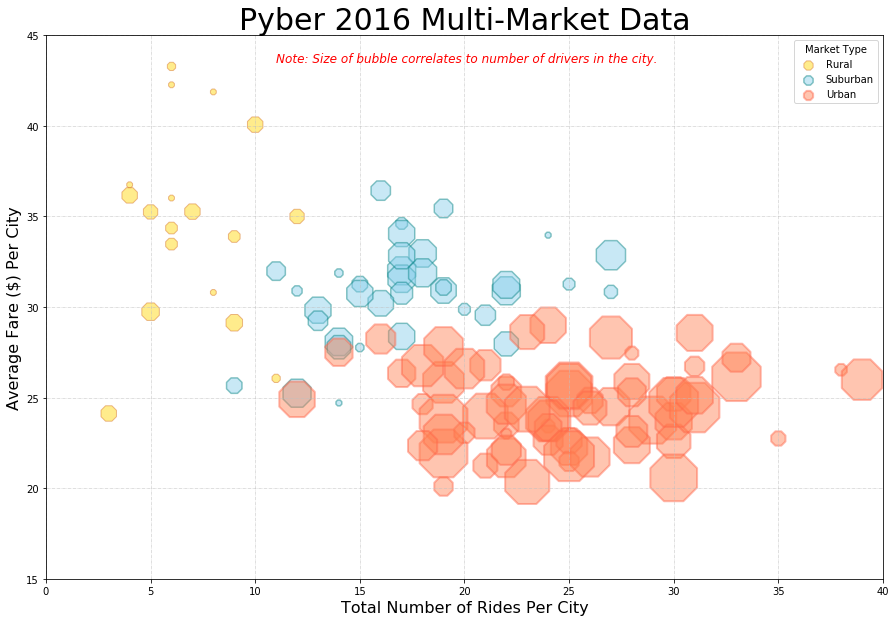

In [9]:
# BUILD BUBBLE PLOT

plt.figure(figsize = (15, 10))

# Add rural stats.
plt.scatter(rural_market['Number of Rides'], rural_market['Average Fare per Ride'], 
            marker = '8', 
            color = 'gold', 
            edgecolor = 'chocolate', 
            label = 'Rural', 
            alpha = 0.45, 
            s = rural_market['Number of Drivers'] * 40, 
            linewidths = 1.0)

# Add suburban stats.
plt.scatter(suburban_market['Number of Rides'], suburban_market['Average Fare per Ride'], 
            marker = '8', 
            color = 'skyblue', 
            edgecolor = 'teal', 
            label = 'Suburban', 
            alpha = 0.45, 
            s = suburban_market['Number of Drivers'] * 40, 
            linewidths = 1.5)

# Add urban stats.
plt.scatter(urban_market['Number of Rides'], urban_market['Average Fare per Ride'], 
            marker = '8', 
            color = 'coral', 
            edgecolor = 'tomato', 
            label = 'Urban', 
            alpha = 0.45, 
            s = urban_market['Number of Drivers'] * 40, 
            linewidths = 2.0)

# Title the plot.
plt.title('Pyber 2016 Multi-Market Data', fontsize = 30)

# Label and limits for x-axis.
plt.xlabel('Total Number of Rides Per City', fontsize = 16)
plt.xlim (0, 40)

# Label and limits for y-axis.
plt.ylabel('Average Fare ($) Per City', fontsize = 16)
plt.ylim (15, 45)

# Add light grid.
plt.grid(color = 'silver', linestyle = '-.', linewidth = 0.5)

# Comment on bubble size relevance.
bubble_size = ('Note: Size of bubble correlates to number of drivers in the city.')
plt.text (11, 43.5, bubble_size, fontsize = 12, color = 'red', style = 'italic', wrap = True)

# Add legend.
plot_legend = plt.legend(title = 'Market Type', fontsize = 10, loc = 'best', scatterpoints = 1)
plot_legend.legendHandles[0]._sizes = [100]
plot_legend.legendHandles[1]._sizes = [100]
plot_legend.legendHandles[2]._sizes = [100]

# Save and display plot.
plt.savefig('Pyber_Multi_Market_Summary_BUBBLE.jpg')
plt.show()

In [10]:
# Calculate percentages by market type:

# : of total FARE 
rural_pct_total_fares = rural_fare_total / total_ALL_fares * 100
suburban_pct_total_fares = suburban_fare_total / total_ALL_fares * 100
urban_pct_total_fares = urban_fare_total / total_ALL_fares * 100

# rural_pct_total_fares
# suburban_pct_total_fares
# urban_pct_total_fares

# : of total RIDES 
rural_pct_total_rides = total_rural_rides / total_ALL_rides * 100
suburban_pct_total_rides = total_suburban_rides / total_ALL_rides * 100
urban_pct_total_rides = total_urban_rides / total_ALL_rides * 100

# rural_pct_total_rides
# suburban_pct_total_rides
# urban_pct_total_rides

# : of total DRIVERS 
rural_pct_total_drivers = rural_drivers / total_ALL_drivers * 100
suburban_pct_total_drivers = suburban_drivers / total_ALL_drivers * 100
urban_pct_total_drivers = urban_drivers / total_ALL_drivers * 100

# rural_pct_total_drivers
# suburban_pct_total_drivers
# urban_pct_total_drivers

In [11]:
# Set variables for pie charts.
market_fares = [rural_pct_total_fares, suburban_pct_total_fares, urban_pct_total_fares]
market_rides = [rural_pct_total_rides, suburban_pct_total_rides, urban_pct_total_rides]
market_drivers = [rural_pct_total_drivers, suburban_pct_total_drivers, urban_pct_total_drivers]

market_types = ['Rural', 'Suburban', 'Urban']
pyber_colors = ['gold', 'skyblue', 'coral']
explode_amount = [0, 0, 0.15]

## Total Fares by Market Type

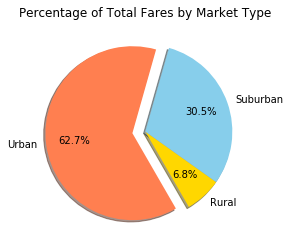

In [12]:
# Plot pie chart for percentage of total fares by market type.
fig, ax = plt.subplots()

plt.pie(market_fares, 
        labels = market_types, 
        colors = pyber_colors, 
        startangle = -60, 
        autopct = '%1.1f%%', 
        explode = explode_amount, 
        pctdistance = 0.675, 
        shadow = True)

ax.set(aspect = 'equal', title = 'Percentage of Total Fares by Market Type')

# Save and display chart.
plt.savefig('Pyber_Fares_by_Market_Type_Comparison_PIE.jpg')
plt.show()

## Total Rides by Market Type

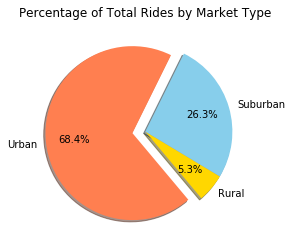

In [13]:
# Plot pie chart for percentage of total rides by market type.
fig, ax = plt.subplots()

plt.pie(market_rides, 
        labels = market_types, 
        colors = pyber_colors, 
        startangle = -50, 
        autopct = '%1.1f%%', 
        explode = explode_amount, 
        pctdistance = 0.675, 
        shadow = True)

ax.set(aspect = 'equal', title = 'Percentage of Total Rides by Market Type')

# Save and display chart.
plt.savefig('Pyber_Rides_by_Market_Type_Comparison_PIE.jpg')
plt.show()

## Total Drivers by Market Type

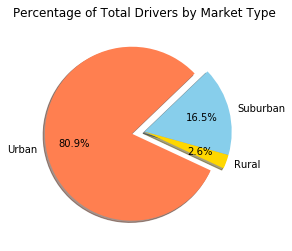

In [14]:
# Plot pie chart for percentage of total drivers by market type.
fig, ax = plt.subplots()

plt.pie(market_drivers, 
        labels = market_types, 
        colors = pyber_colors, 
        startangle = -25, 
        autopct = '%1.1f%%', 
        explode = explode_amount, 
        pctdistance = 0.675, 
        shadow = True)

ax.set(aspect = 'equal', title = 'Percentage of Total Drivers by Market Type')

# Save and display chart.
plt.savefig('Pyber_Drivers_by_Market_Type_Comparison_PIE.jpg')
plt.show()

## ADDITIONAL ANALYSIS: Average Rides per Driver

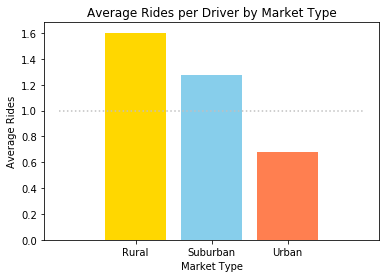

In [15]:
rides = [rural_rides_per_driver, suburban_rides_per_driver, urban_rides_per_driver]

plt.bar(market_types, rides, color = pyber_colors, align = 'center', alpha = 1)
plt.hlines(1, -1, 3, linestyles = ':', color = 'silver')
plt.xticks(market_types)
plt.xlabel('Market Type')
plt.ylabel('Average Rides')
plt.title('Average Rides per Driver by Market Type')

plt.savefig('Pyber_Rides_per_Driver_and_Market_Type_BAR.jpg')
plt.show()

## ADDITIONAL ANALYSIS: Average Fare per Driver

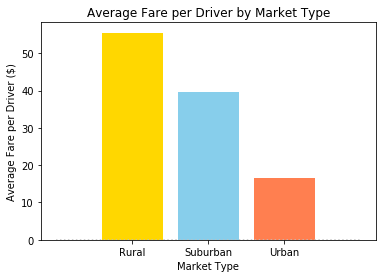

In [16]:
fares = [rural_driver_average, suburban_driver_average, urban_driver_average]

plt.bar(market_types, fares, color = pyber_colors, align = 'center', alpha = 1)
plt.hlines(0, -1, 3, linestyles = ':', color = 'silver')
plt.xticks(market_types)
plt.xlabel('Market Type')
plt.ylabel('Average Fare per Driver ($)')
plt.title('Average Fare per Driver by Market Type')

plt.savefig('Pyber_Fare_per_Driver_and_Market_Type_BAR.jpg')
plt.show()